# ESPACIOS DE COLOR - RECORTE INTERACTIVO - RUIDO GAUSSIANO CON CV2.GAUSSIAN Y DETECCION DE BORDES CON CV2.CANNY
Autor: Serafini, Martin Nicolas


El objetivo del presente trabajo es facilitar la iteracion de los valores optimos para el recorte y procesamiento de una imagen con desenfoque gaussiano y Canny para la deteccion de bordes incluidos en la libreria cv2.

Los valores se almacenan en una lista que es devuelta por la funcion para ser utilizada en una instancia posterior del procesamiento.


Funcionalidades
* Cargar una imagen y analizar sus canales
* Alternar diferentes mapas de color utilizando Matplotlib
* Conversiones entre BGR y RGB
* Recorte interactivo
* Deteccion de bordes con seleccion de parametros interactivo
* Desenfoque gaussiano con seleccion de parametros interactivo

## IMPORTACION DE LIBRERIAS Y CHEQUEO DEL ENTORNO

In [18]:
# Instalo las bibliotecas requeridas
!pip install scikit-image watermark -q

In [19]:
# Importo las bibliotecas necesarias para el procesamiento de imágenes
import numpy as np
import cv2
from cv2 import imread
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from IPython.display import display
from ipywidgets import interact, Checkbox, Dropdown
import re
import numpy as np
import os
import urllib.request

In [20]:
# Instalo la biblioteca watermark para mostrar información del entorno
%load_ext watermark
%watermark
%watermark --iversions

The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark
Last updated: 2025-04-15T16:00:45.859783+00:00

Python implementation: CPython
Python version       : 3.11.11
IPython version      : 7.34.0

Compiler    : GCC 11.4.0
OS          : Linux
Release     : 6.1.85+
Machine     : x86_64
Processor   : x86_64
CPU cores   : 2
Architecture: 64bit

numpy     : 1.26.4
matplotlib: 3.10.0
cv2       : 4.11.0
IPython   : 7.34.0
ipywidgets: 7.7.1
re        : 2.2.1



## CARGA DE LA IMAGEN

Links de prueba:

Fotos a color:
https://www2.eecs.berkeley.edu/Research/Projects/CS/vision/bsds/BSDS300/html/images/plain/normal/color/86000.jpg

https://i0.wp.com/puppis.blog/wp-content/uploads/2022/03/etapas-desarrollo-perros-cachorros-gatitos-min.jpg

Homero:
https://wallpapers.com/images/featured/imagenes-divertidas-de-homer-simpson-nv3un39cjzu6qjju.jpg

Paleta de colores:
https://cdn.pixabay.com/photo/2013/07/12/18/38/colors-153623_1280.png


In [21]:

# Pido al usuario que ingrese una URL
url = input("Ingrese la URL de la imagen: ")

# Verifico que la URL sea válida utilizando una expresión regular
pattern = re.compile(r'^(https?|ftp)://[^\s/$.?#].[^\s]*$')
if not pattern.match(url):
    print("Error: La URL ingresada no es válida.")
else:
    # Verifico si la URL corresponde a una imagen validando la extensión
    if not url.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif')):
        print("Error: La URL no corresponde a una imagen válida.")
    else:
        # Descargo la imagen utilizando wget
        os.system(f"wget {url}")

        # Extraigo el nombre del archivo de la URL para cargar la imagen
        filename = url.split("/")[-1]

        # Cargo la imagen en la variable 'imagen'
        imagen = cv2.imread(filename)

        print("Imagen cargada exitosamente.")

Ingrese la URL de la imagen: https://www2.eecs.berkeley.edu/Research/Projects/CS/vision/bsds/BSDS300/html/images/plain/normal/color/86000.jpg
Imagen cargada exitosamente.


La imagen se abre utilizando la libreria cv2, generando que se cargue en formato BGR en lugar de RGB como usualmente se muestran las imagenes.3

Al mostrar la imagen con los canales de color permutados ocaciona una distorsion de los mismos.

## PROCESAMIENTO DE LA IMAGEN


In [22]:
# Saco los datos del tamaño para usarlos en los sliders para el recorte
alto, ancho, cant_canales = imagen.shape

# Genero una lista vacia donde van a almacenarse todos los seteos que haga para usarlos en etapas posteriores
recorte = []

# Funcion para procesar la imagen
def mostrar_recorte(y1=0, y2=alto, x1=0, x2=ancho, convertir_rgb=False, mapas_color=True, aplicar_canny=False, Umbral_Inf=100, Umbral_Sup=200, aplicar_gauss=False, kernel=5, sigma=0, border_type=cv2.BORDER_DEFAULT):
    img_recortada = imagen[y1:y2, x1:x2]

    canal_1 = img_recortada[:, :, 0]
    canal_2 = img_recortada[:, :, 1]
    canal_3 = img_recortada[:, :, 2]

    def mostrar_stats():
        print()
        titulo="Intensidad de los canales de color"
        columnas = ("Canal", "Minimo", "Maximo", "Promedio")
        print(f"{titulo:^45}")
        print(f"{columnas[0]:^15}{columnas[1]:^10}{columnas[2]:^10}{columnas[3]:^10}")
        print(f"{canales_nombres[0]:<15}{canal_1.min():10}{canal_1.max():10}{canal_1.mean():10.2f}")
        print(f"{canales_nombres[1]:<15}{canal_2.min():10}{canal_2.max():10}{canal_2.mean():10.2f}")
        print(f"{canales_nombres[2]:<15}{canal_3.min():10}{canal_3.max():10}{canal_3.mean():10.2f}")
        print()

    if convertir_rgb:
        img_recortada = cv2.cvtColor(img_recortada, cv2.COLOR_BGR2RGB)
        if mapas_color:
            colores=["Blues","Greens","Reds"]
        else:
            colores=["grey","grey","grey"]
        canal_1 = img_recortada[:, :, 2]
        canal_2 = img_recortada[:, :, 1]
        canal_3 = img_recortada[:, :, 0]
        canales_nombres=["Canal Azul","Canal Verde","Canal Rojo"]
        mostrar_stats()
    else:
        if mapas_color:
            colores=["Reds","Greens","Blues"]
        else:
            colores=["grey","grey","grey"]
        canales_nombres=["Canal Rojo","Canal Verde","Canal Azul"]
        mostrar_stats()

    if aplicar_gauss:
        img_recortada = cv2.GaussianBlur(img_recortada, (kernel,kernel), sigma, borderType=border_type)
        canal_1 = cv2.GaussianBlur(canal_1, (kernel,kernel), sigma, borderType=border_type)
        canal_2 = cv2.GaussianBlur(canal_2, (kernel,kernel), sigma, borderType=border_type)
        canal_3 = cv2.GaussianBlur(canal_3, (kernel,kernel), sigma, borderType=border_type)

    if aplicar_canny:
        img_recortada = cv2.Canny(img_recortada, Umbral_Inf, Umbral_Sup)
        canal_1 = cv2.Canny(canal_1, Umbral_Inf, Umbral_Sup)
        canal_2 = cv2.Canny(canal_2, Umbral_Inf, Umbral_Sup)
        canal_3 = cv2.Canny(canal_3, Umbral_Inf, Umbral_Sup)

    fig, axs = plt.subplots(1, 4, figsize=(15, 5))
    axs[0].imshow(img_recortada, cmap='gray' if aplicar_canny else None)
    axs[0].set_title("Imagen Recortada")
    axs[0].axis("off")

    axs[1].imshow(canal_1, cmap=colores[0])
    axs[1].set_title(canales_nombres[0])
    axs[1].axis("off")

    axs[2].imshow(canal_2, cmap=colores[1])
    axs[2].set_title(canales_nombres[1])
    axs[2].axis("off")

    axs[3].imshow(canal_3, cmap=colores[2])
    axs[3].set_title(canales_nombres[2])
    axs[3].axis("off")

    plt.show()

    # Genera la lista con los datos del recorte
    # Como se va iterando, con cada cambio se genera una nueva lista de datos
    recorte.clear()
    recorte.extend([y1, y2, x1, x2, aplicar_canny, Umbral_Inf, Umbral_Sup, aplicar_gauss, kernel, sigma, border_type])
    #recorte = [y1, y2, x1, x2, aplicar_canny, Umbral_Inf, Umbral_Sup, aplicar_gauss, kernel, sigma, border_type]
    # Devuelve la lista
    return recorte

# Opciones de borde para desenfoque gaussiano
border_options = {
    "BORDER_CONSTANT": cv2.BORDER_CONSTANT,
    "BORDER_REPLICATE": cv2.BORDER_REPLICATE,
    "BORDER_REFLECT": cv2.BORDER_REFLECT,
    "BORDER_WRAP": cv2.BORDER_WRAP,
    "BORDER_REFLECT_101": cv2.BORDER_REFLECT_101
}

# Este es el objeto interactivo que guarda los controles
widget = interact(mostrar_recorte,
         y1=(0, alto, 1), y2=(0, alto, 1),
         x1=(0, ancho, 1), x2=(0, ancho, 1),
         convertir_rgb=Checkbox(value=False, description='Convertir a RGB'),
         mapas_color=Checkbox(value=False, description='Mapas de Color'),
         aplicar_canny=Checkbox(value=False, description='Aplicar Canny'), Umbral_Inf=(0, 255, 1), Umbral_Sup=(0, 255, 1),
         aplicar_gauss=Checkbox(value=False, description='Aplicar Gauss'),
         kernel=(1, 21, 2), sigma=(0,5,0.1),
         border_type=Dropdown(options=border_options, description='Border Type'))


# Se muestra el widget
display(widget)

interactive(children=(IntSlider(value=0, description='y1', max=481), IntSlider(value=481, description='y2', ma…

<function __main__.mostrar_recorte(y1=0, y2=481, x1=0, x2=321, convertir_rgb=False, mapas_color=True, aplicar_canny=False, Umbral_Inf=100, Umbral_Sup=200, aplicar_gauss=False, kernel=5, sigma=0, border_type=4)>

###Explicacion de los tonos de los canales de color
* Los tonos tendientes al blanco hablan del nivel de saturacion especifico del color mapeado en ese canal (valores tendientes a 255).
* Los tonos tendientes a negro hacen referencia al nivel de ausencia del color en ese canal (valores tendientes al 0).

##DATOS DEL RECORTE
Los datos del recorte son almacenados en una lista, la misma puede ser accedida en etapas posteriores para replicar el trabajo realizado.

In [23]:
# Accedo a los valores del recorte
recorte

[0, 481, 0, 321, False, 100, 200, False, 5, 0.0, 0]

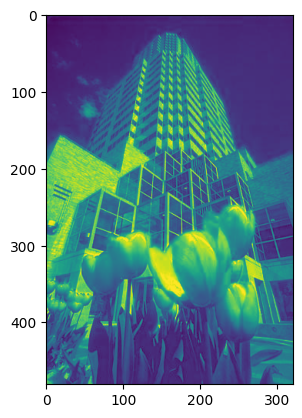

In [24]:
canal_prueba = imagen[recorte[0]:recorte[1], recorte[2]:recorte[3],2]
plt.imshow(canal_prueba)
plt.show()

## Librerias usadas

### Interact
**interact** es una función de la librería ipywidgets que genera automáticamente controles de interfaz gráfica (sliders, dropdowns, checkboxes, etc.) para manipular parámetros de funciones en tiempo real.

###OpenCV
**OpenCV (Open Source Computer Vision Library)** es una biblioteca de código abierto ampliamente utilizada para el desarrollo de aplicaciones relacionadas con la visión por computador y el procesamiento de imágenes. Fue desarrollada originalmente por Intel y actualmente es mantenida por una comunidad activa de desarrolladores.

Características principales:
* Formato BGR por defecto:
  Una de las particularidades de OpenCV es que, a diferencia de muchas otras bibliotecas que trabajan con imágenes en formato RGB (Rojo, Verde, Azul), OpenCV utiliza por defecto el formato BGR (Azul, Verde, Rojo). Esto es importante tenerlo en cuenta al momento de visualizar o manipular imágenes, especialmente si se combinan con otras herramientas que esperan un orden de colores diferente.
* Eficiencia en términos de procesamiento:
  OpenCV está optimizada para ofrecer un rendimiento alto, incluso en tiempo real. Internamente utiliza implementaciones eficientes en C/C++, lo que permite el procesamiento rápido de imágenes y video. Además, muchas de sus operaciones están aceleradas mediante el uso de instrucciones SIMD (como SSE o AVX) y puede aprovechar hardware como GPUs mediante CUDA u OpenCL.
* Ampliamente utilizada en aplicaciones de visión computacional:
  Es una de las bibliotecas más populares en el ámbito de la visión artificial, y se emplea tanto en entornos académicos como industriales. Con OpenCV se pueden implementar fácilmente tareas como:

  - Detección de objetos y rostros
  - Seguimiento de movimiento
  - Reconocimiento de patrones y formas
  - Procesamiento de imágenes médicas
  - Sistemas de visión para robots
  - Aplicaciones de realidad aumentada, entre otros

Además, OpenCV ofrece una amplia gama de funciones que abarcan desde operaciones básicas como lectura y escritura de imágenes, filtros, transformaciones geométricas y detección de bordes, hasta herramientas más complejas para aprendizaje automático y redes neuronales profundas.

###Canny
La función **cv2.Canny** se utiliza para la detección de bordes en imágenes. Implementa el algoritmo de Canny, que resalta los contornos significativos eliminando detalles no esenciales.

Ejemplo: cv2.Canny(image, threshold1, threshold2, apertureSize=3, L2gradient=False)

Parámetros
1. image:	Imagen de entrada en escala de grises. Si es en color, hay que convertirla a grayscale.	Matriz numpy de tipo uint8
2. threshold1	Umbral inferior para la supresión de bordes.
  - Valores admitidos: 0 a 255 (Valores típicos: 50 - 100)
3. threshold2	Umbral superior para la detección de bordes fuertes.
  - Valores admitidos: 0 a 255 (Valores típicos: 150 - 200)
  - Un valor de threshold2 2-3 veces mayor que threshold1 suele funcionar bien.
4. apertureSize	Tamaño del kernel de Sobel (debe ser impar).
  - Valores admitidos: 3, 5, o 7 (Por defecto: 3)
  - Controla el tamaño del filtro Sobel, que calcula los gradientes de la imagen:
      - 3: Menos detalle, más rápido.
      - 5: Balance entre precisión y rendimiento.
      - 7: Más detalle, más lento.
5. L2gradient	Si es True, usa la norma L2 en el cálculo del gradiente (más preciso pero más lento). Si es False, usa la norma L1 (más rápida).
  - Valores admitidos: True o False (Por defecto: False)


###GaussianBlur
La función **cv2.GaussianBlur()** de OpenCV se usa para aplicar un filtro de desenfoque gaussiano a una imagen.

Ejemplo:
cv2.GaussianBlur(src, ksize, sigmaX[, dst[, sigmaY[, borderType]]])

Parámetros:
1. src (Obligatorio):
  - Tipo: numpy.ndarray (Imagen de entrada) Debe ser una imagen en escala de
  grises o en color.
2. ksize (Obligatorio)
  - Tipo: tuple (ancho, alto)
  - Es el tamaño del kernel (matriz de convolución) utilizado para aplicar el filtro gaussiano. Debe ser un valor impar y positivo como (3,3), (5,5), (7,7), etc.
  - Valores admitidos: (1,1), (3,3), (5,5), (7,7), etc. (Siempre impares y positivos)
3. sigmaX (Obligatorio):
  - Tipo: float
  - Es la desviación estándar de la función gaussiana en la dirección X (horizontal).
  - Si se establece en 0, OpenCV calculará automáticamente un valor óptimo en función de ksize.
  - Valores admitidos: >= 0
4. sigmaY (Opcional, por defecto 0):
  - Tipo: float
  - Es la desviación estándar en la dirección Y (vertical).
  - Si se establece en 0, se tomará el mismo valor que sigmaX.
  - Valores admitidos: >= 0
5. borderType (Opcional, por defecto cv2.BORDER_DEFAULT):
  - Define cómo se manejan los bordes de la imagen.
  - Valores admitidos:
    - cv2.BORDER_CONSTANT → Agrega un borde constante.
    - cv2.BORDER_REPLICATE → Repite los píxeles de los bordes.
    - cv2.BORDER_REFLECT → Refleja la imagen en los bordes.
    - cv2.BORDER_WRAP → Envuelve la imagen en los bordes.
    - cv2.BORDER_DEFAULT → Equivalente a cv2.BORDER_REFLECT_101.


